# Visualisations simples
## Shawn et Hanifa
___

In [11]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
sea.set_style('darkgrid')
import matplotlib.pyplot as plt
from scipy.spatial import distance
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://drive.google.com/file/d/13EYjKfR3nLPlO1Fp6JrMV5zqVDh97Hct/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [3]:
df

,event_Idx,periodTime,id_team_that_shot,name_team_that_shot,result_event,x_coord,y_coord,goalie_name,shooter_name,shot_type,empty_net,strength,type_season,id_game,season,dateTime,endDateTime,abstractGameState,team_away_name,team_home_name
0,4,00:13,23,Vancouver Canucks,Shot,-78.0,4.0,Martin Jones,Sam Gagner,Wrist Shot,NaN,NaN,regular_season,2017020495,20172018,2017-12-16T03:00:00Z,2017-12-16T05:38:03Z,Final,San Jose Sharks,Vancouver Canucks
1,5,00:14,23,Vancouver Canucks,Shot,-81.0,0.0,Martin Jones,Sam Gagner,Wrist Shot,NaN,NaN,regular_season,2017020495,20172018,2017-12-16T03:00:00Z,2017-12-16T05:38:03Z,Final,San Jose Sharks,Vancouver Canucks
2,9,00:44,23,Vancouver Canucks,Goal,-79.0,-1.0,Martin Jones,Markus Granlund,Deflected,False,NaN,regular_season,2017020495,20172018,2017-12-16T03:00:00Z,2017-12-16T05:38:03Z,Final,San Jose Sharks,Vancouver Canucks
3,11,01:20,23,Vancouver Canucks,Shot,-67.0,20.0,Martin Jones,Brock Boeser,Wrist Shot,NaN,NaN,regular_season,2017020495,20172018,2017-12-16T03:00:00Z,2017-12-16T05:38:03Z,Final,San Jose Sharks,Vancouver Canucks
4,15,02:08,23,Vancouver Canucks,Shot,-38.0,-1.0,Martin Jones,Alex Biega,Slap Shot,NaN,NaN,regular_season,2017020495,20172018,2017-12-16T03:00:00Z,2017-12-16T05:38:03Z,Final,San Jose Sharks,Vancouver Canucks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391226,284,18:09,16,Chicago Blackhawks,Shot,-77.0,22.0,Semyon Varlamov,Jordin Tootoo,Snap Shot,NaN,NaN,playoffs,2016020153,20162017,2016-11-04T00:30:00Z,2016-11-04T03:03:39Z,Final,Colorado Avalanche,Chicago Blackhawks
391227,287,18:55,21,Colorado Avalanche,Shot,74.0,-4.0,Corey Crawford,Nathan MacKinnon,Wrist Shot,NaN,NaN,playoffs,2016020153,20162017,2016-11-04T00:30:00Z,2016-11-04T03:03:39Z,Final,Colorado Avalanche,Chicago Blackhawks
391228,288,19:12,21,Colorado Avalanche,Shot,76.0,30.0,Corey Crawford,Francois Beauchemin,Wrist Shot,NaN,NaN,playoffs,2016020153,20162017,2016-11-04T00:30:00Z,2016-11-04T03:03:39Z,Final,Colorado Avalanche,Chicago Blackhawks
391229,291,19:33,16,Chicago Blackhawks,Shot,-35.0,-25.0,Semyon Varlamov,Gustav Forsling,Slap Shot,NaN,NaN,playoffs,2016020153,20162017,2016-11-04T00:30:00Z,2016-11-04T03:03:39Z,Final,Colorado Avalanche,Chicago Blackhawks


---
## Question 1 

Produisez un graphique comparant les types de tirs sur toutes les équipes dans une saison de votre choix (i.e. agrégez juste sur tous les tirs). Superposez le nombre de buts sur le nombre de tirs. Quel semble être le type de tir le plus dangereux ? Le type de tir le plus courant? Pourquoi est-ce que vous avez choisi ce type de graphique. Ajoutez cette figure et cette discussion à votre article de blog.

In [19]:
df2018 = df[df['season']==20182019]
df2019 = df[df['season']==20192020]
df2020 = df[df['season']==20202021]

In [20]:
def q1_graph(df):
    
##### Ici on crée des dataframes contenant le compte de tirs/buts par type de tir 

    # Filtre les tirs par shot type
    wrist_shot = (df['shot_type'] == 'Wrist Shot') & (df['result_event'] == 'Shot')
    slap_shot = (df['shot_type'] == 'Slap Shot') & (df['result_event'] == 'Shot')
    snap_shot = (df['shot_type'] == 'Snap Shot') & (df['result_event'] == 'Shot')
    back_shot = (df['shot_type'] == 'Backhand') & (df['result_event'] == 'Shot')
    tip_shot = (df['shot_type'] == 'Tip-In') & (df['result_event'] == 'Shot')
    def_shot = (df['shot_type'] == 'Deflected') & (df['result_event'] == 'Shot')
    wrap_shot = (df['shot_type'] == 'Wrap-around') & (df['result_event'] == 'Shot')
    # Filtre les buts par shot type
    wrist_goal = (df['shot_type'] == 'Wrist Shot') & (df['result_event'] == 'Goal')
    slap_goal = (df['shot_type'] == 'Slap Shot') & (df['result_event'] == 'Goal')
    snap_goal = (df['shot_type'] == 'Snap Shot') & (df['result_event'] == 'Goal')
    back_goal = (df['shot_type'] == 'Backhand') & (df['result_event'] == 'Goal')
    tip_goal = (df['shot_type'] == 'Tip-In') & (df['result_event'] == 'Goal')
    def_goal = (df['shot_type'] == 'Deflected') & (df['result_event'] == 'Goal')
    wrap_goal = (df['shot_type'] == 'Wrap-around') & (df['result_event'] == 'Goal')

    #Compte par type de tir 
    ws = int(df[wrist_shot]['result_event'].value_counts())
    sls = int(df[slap_shot]['result_event'].value_counts())
    sns = int(df[snap_shot]['result_event'].value_counts())
    bs = int(df[back_shot]['result_event'].value_counts())
    ts = int(df[tip_shot]['result_event'].value_counts())
    ds = int(df[def_shot]['result_event'].value_counts())
    wrs = int(df[wrap_shot]['result_event'].value_counts())

    wg = int(df[wrist_goal]['result_event'].value_counts())
    slg = int(df[slap_goal]['result_event'].value_counts())
    sng = int(df[snap_goal]['result_event'].value_counts())
    bg = int(df[back_goal]['result_event'].value_counts())
    tg = int(df[tip_goal]['result_event'].value_counts())
    dg = int(df[def_goal]['result_event'].value_counts())
    wrg = int(df[wrap_goal]['result_event'].value_counts())


    # Crée un dictionnaire pour chaque type de tir, et une liste de ce dicitonnaire 
    # à la fin, pour en faire un dataframe
    wdict = {"Shots": ws,"Goals": wg}
    sldict =  {"Shots": sls,"Goals": slg}
    sndict =  {"Shots": sns,"Goals": sng}
    bdict =  {"Shots": bs,"Goals": bg}
    tdict =  {"Shots": ts,"Goals": tg}
    ddict =  {"Shots": ds,"Goals": dg}
    wrdict =  {"Shots": wrs,"Goals": wrg}

    lst_of_dics = {'Wrist': wdict, 
                   'Slap': sldict, 
                   'Snap': sndict,
                   'Backhand': bdict, 
                   'Tip-In': tdict, 
                   'Deflected': ddict, 
                   'Wrap-around': wrdict}

    shottype = ['Wrist', 'Slap', 'Snap', 'Backhand', 'Tip-In', 'Deflected', 'Wrap-around']
    shotgoal_df = pd.DataFrame(lst_of_dics, columns = shottype).T

    # Crée le dataframe contenant les pourcentages de réussites/échecs
    shotgoal_df_perc = shotgoal_df.copy()
    shotgoal_df_perc['Goal_Percentage'] = (shotgoal_df['Goals'] / (shotgoal_df['Shots'] + shotgoal_df['Goals']) *100)
    shotgoal_df_perc['Miss_Percentage'] = (shotgoal_df['Shots'] / (shotgoal_df['Shots'] + shotgoal_df['Goals']) *100)

#### Plotter figure avec dataframes précédents en les superposant

    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax2 = ax.twinx()
    width = 0.3

    shotgoal_df.plot(kind='bar', stacked=True, color=['red', 'green'], ax=ax, width=width, position=1)
    shotgoal_df_perc['Goal_Percentage'].plot(kind='bar', ax=ax2, width=width, position=0)

    plt.title('Nombre total de tirs et de buts par type de tir et\n proportion de buts marqués par type de tir\nSaison régulière 2018-2019')
    ax.set_ylabel('Tirs au but')
    ax2.set_ylabel('% de but')
    
    return

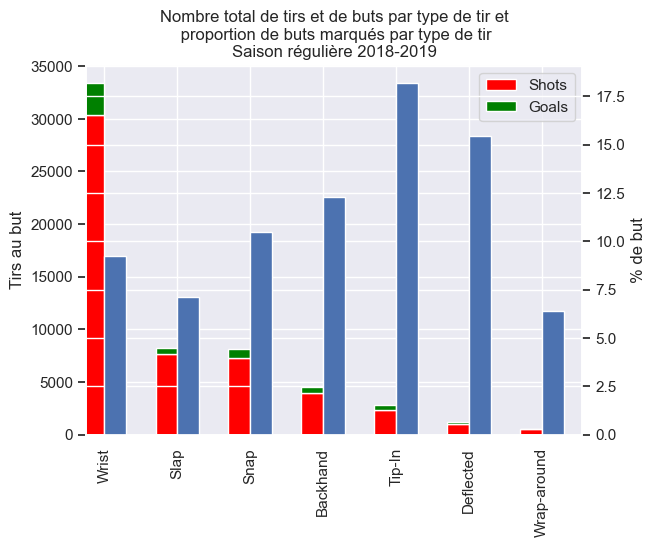

In [21]:
q1_graph(df2020)

### Réponse: 
Le type de tir **le plus dangeureux est le Tip-In**. Le type de tir **le plus courant, le Wrist Shot**. Nous avons choisi un barplot à deux axes verticaux, car il communique efficacement que le nombre brut de tirs pour un type de tir donné n'est pas *nécessairement* représentatif de son efficacité. Ce graphique suggère peut-être que : les types de tir ayant lieu plus proches du filet (Tip_in ou Deflected, par exemple) sont moins fréquents, car il est plus difficile de 

    1. s'approcher du filet ET 
    2. être en possession de la rondelle ET
    3. être en position pour effectuer un de ces types de tir/être chanceux. 
***Toutefois***, lorsque tous les « paramètres » le permettent, ces tirs sont très efficaces, car ils laissent moins de temps au gardien pour réagir et arrêter le tir. Conséquemment, leur % de réussite est plus élevé.

---

## Question 2

Quelle est la relation entre la distance à laquelle un tir a été effectué et la chance qu'il s'agisse d'un but ? Produisez un graphique pour chaque saison entre 2018-19 et 2020-21 pour répondre à cette question, et ajoutez-le à votre article de blog avec quelques phrases décrivant votre silhouette. Y a-t-il eu beaucoup de changements au cours des trois dernières saisons? Pourquoi est-ce que vous avez choisi ce type de graphique?

In [22]:
# Diviser le dataframe total en dataframes par saison
df_2018 = df.loc[df['season'] == 20182019].filter(['result_event', 'x_coord', 'y_coord', 'shot_type'])
df_2019 = df.loc[df['season'] == 20192020].filter(['result_event', 'x_coord', 'y_coord'])
df_2020 = df.loc[df['season'] == 20202021].filter(['result_event', 'x_coord', 'y_coord'])
df_2018

,result_event,x_coord,y_coord,shot_type
222710,Shot,-39.0,-33.0,Snap Shot
222711,Shot,-47.0,23.0,Snap Shot
222712,Shot,-78.0,5.0,Snap Shot
222713,Shot,-39.0,-13.0,Snap Shot
222714,Shot,-76.0,-32.0,Backhand
...,...,...,...,...
309818,Shot,89.0,4.0,Wrist Shot
309819,Shot,-50.0,-37.0,Wrist Shot
309820,Shot,-58.0,-20.0,Wrist Shot
309821,Shot,-21.0,15.0,Wrist Shot


In [8]:
df_2018['dist'] = np.sqrt(np.square(90 - abs(df_2018['x_coord'])) + np.square(df_2018['y_coord']))
df_2019['dist'] = np.sqrt(np.square(90 - abs(df_2019['x_coord'])) + np.square(df_2019['y_coord']))
df_2020['dist'] = np.sqrt(np.square(90 - abs(df_2020['x_coord'])) + np.square(df_2020['y_coord']))

In [9]:
df_2018_with_type = df_2018.drop(['x_coord', 'y_coord'], axis=1)
df_2018 = df_2018.drop(['x_coord', 'y_coord', 'shot_type'], axis =1)
df_2019 = df_2019.drop(['x_coord', 'y_coord'], axis =1)
df_2020 = df_2020.drop(['x_coord', 'y_coord'], axis =1)
df_2018_with_type

,result_event,shot_type,dist
222710,Shot,Snap Shot,60.745370
222711,Shot,Snap Shot,48.764741
222712,Shot,Snap Shot,13.000000
222713,Shot,Snap Shot,52.630789
222714,Shot,Backhand,34.928498
...,...,...,...
309818,Shot,Wrist Shot,4.123106
309819,Shot,Wrist Shot,54.488531
309820,Shot,Wrist Shot,37.735925
309821,Shot,Wrist Shot,70.611614


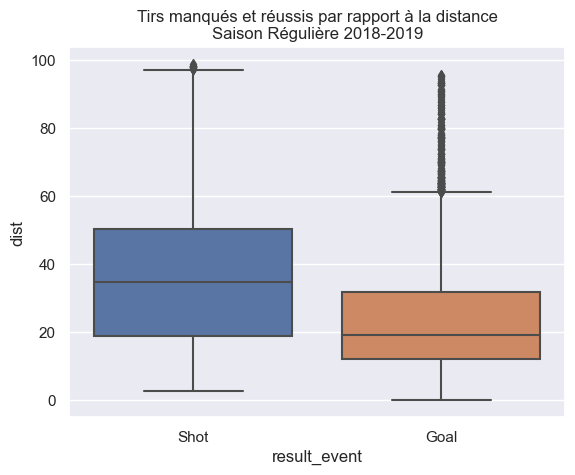

In [15]:
sns.set(style="darkgrid")
sns.boxplot(x=df_2018['result_event'], y=df_2018['dist'])
plt.title('Tirs manqués et réussis par rapport à la distance\nSaison Régulière 2018-2019')
plt.show()

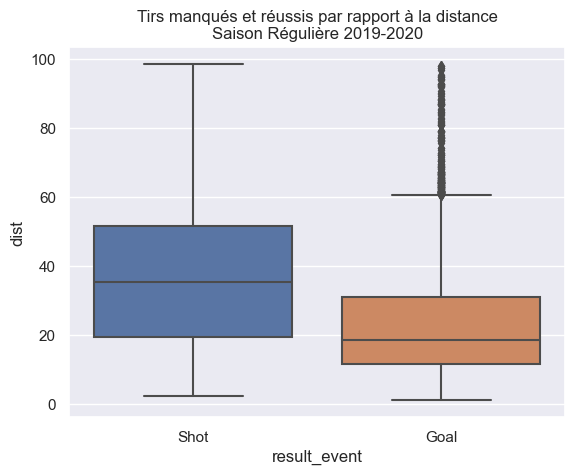

In [16]:
sns.set(style="darkgrid")
sns.boxplot(x=df_2019['result_event'], y=df_2019['dist'])
plt.title('Tirs manqués et réussis par rapport à la distance\nSaison Régulière 2019-2020')
plt.show()

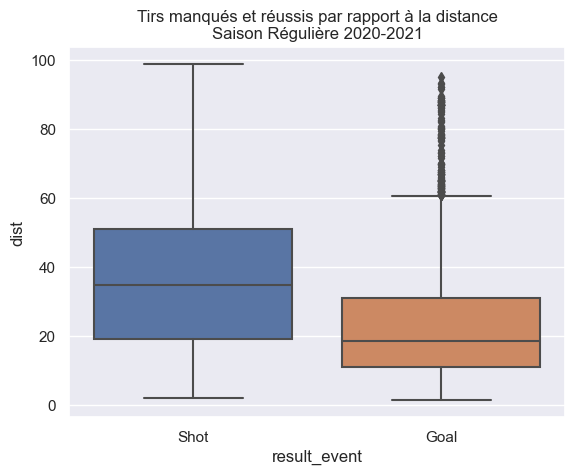

In [17]:
sns.set(style="darkgrid")
sns.boxplot(x=df_2020['result_event'], y=df_2020['dist'])
plt.title('Tirs manqués et réussis par rapport à la distance\nSaison Régulière 2020-2021')
plt.show()

### Réponse:
La distance à laquelle les tirs sont effectués, tous tirs confondus, importe beaucoup : la plupart des buts sont, en moyenne, effectués depuis une moins grande distance du filet que les tirs manqués. Aussi, l'étendue des distances pour les buts est beaucoup plus petite que pour les tirs manqués.

Il ne semble pas y avoir eu de changement au cours des 3 dernières saisons. Une explication potentielle réside peut-être dans le fait que les diverses stratégies **efficaces** (incluant des jeux servant à « mettre la table » pour certains types de tir) utilisées au hockey ne sont pas ***si*** mystérieuses: être le plus proche du filet lorsqu'on s'apprête à tirer augmente les chances de marquer, car la précision du tireur est meilleure et la temps de réaction du gardien est limité.

Nous avons choisi des boxplots, car ils mettent aisément en relation une variable catégorielle avec une variable continue. Puis, la visualisation de l'étendue de la variable continue permet d'approximer les distances à partir desquelles les tirs manqués/réussis sont effectués fréquemment.

*Notons au passage qu'il semble y avoir beaucoup de points de données à une distance > 60 pour les buts. Cela s'explique peut-être grâce aux situations où le gardien de l'équipe adverse a été retiré, facilitant ainsi les buts à grande distance du filet.*

---

## Question 3

Combinez les informations des sections précédentes pour produire un graphique qui montre le pourcentage de buts (# buts / # tirs) en fonction à la fois de la distance par rapport au filet et de la catégorie de types de tirs (vous pouvez choisir une seule saison de votre choix) brièvement Discutez de vos conclusions ; Par exemple, quels pourraient être les types de tirs les plus dangereux ?

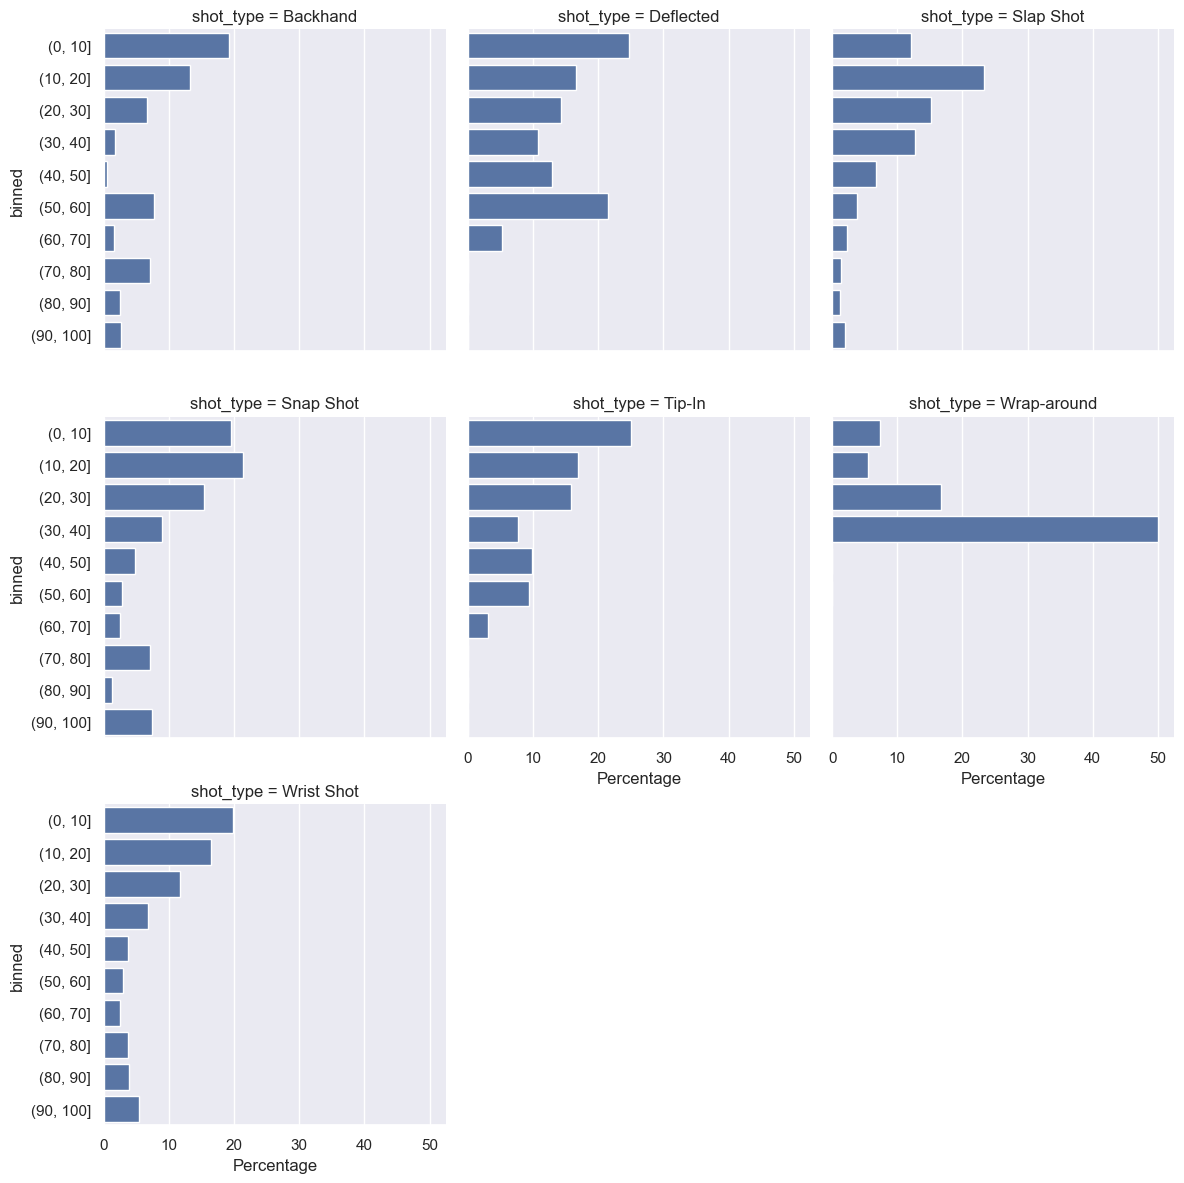

In [23]:
def plotGraph(pframe):
    g = sns.FacetGrid(pframe, col='shot_type', height=4, col_wrap=3)
    g.map(sns.barplot, 'Percentage', 'binned', orient='h')
    plt.show()
    print()

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # bins for distance

shotGroup= df_2018_with_type
goalGroup = shotGroup.loc[shotGroup['result_event'] == 'Goal']
goalGroup['binned'] = pd.cut(goalGroup['dist'], bins)
  
visualGoal = goalGroup.groupby(['shot_type','binned']).size().reset_index(name="goal_count")
  
# Compute the percentage of goal
shotGroup['binned'] = pd.cut(shotGroup['dist'], bins)
visualAll = shotGroup.groupby(['shot_type','binned']).size().reset_index(name="shot_count")

visualGoal['shot_count'] = visualAll['shot_count'] # combine the prev line with this one
visualGoal['Percentage'] = visualGoal['goal_count']/visualGoal['shot_count'] * 100
  
plotGraph(visualGoal)

## Réponse:

Ces graphiques illustrent que malgré sa position en tant que tir le plus fréquent, le Wrist Shot n'est pas toujours le tir le plus dangereux. En effet, son niveau de dangerosité diminue beaucoup après 20 pieds. Ainsi, les tirs les plus dangereux lorsqu'on est proche du filet sont le Tip-In et le Deflected, ce qui étaye l'hypothèse de la dernière question. À distance moyenne et longue, le Slap Shot et Snap Shot sont fréquemment les plus dangereux, sans doute à cause de leur force/vitesse remarquable, mais le Wrist Shot est similairement efficace à distance moyenne. Toutefois, on pourrait argumenter que le Snap et Slap sont plus dangereux plus l'on est proche (en termes de force et de vitesse, mais aussi en termes de pourcentage, tel que vu dans les graphiques ci-dessus). Au final, une généralisation affirmant que les Wrist Shot sont les plus dangereux ne serait tout à fait exacte, mais pas entièrement fausse non plus. Considérant la facilité relative avec laquelle un wrist shot peut être exécuté, peu importe la distance, cela fait de lui le tir le plus « payant », en comparaison avec le Slap Shot, par exemple, qui prend beaucoup de temps à préparer. 

---